In [69]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [70]:
# This example is from chapter 7.4 in Lay's Linear Algebra Text
A = np.array([[4,11,14],[8,7,-2]])

In [86]:
# Make data
u = np.array([np.linspace(0, 2 * np.pi, 1000)])
v = np.linspace(0, np.pi, 1000)
X = 1 * np.outer(np.cos(u), np.sin(v))
Y = 1 * np.outer(np.sin(u), np.sin(v))
Z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

In [87]:
sphere_array = np.array([X.reshape(1000**2),Y.reshape(1000**2),Z.reshape(1000**2)])
image_array = A@sphere_array


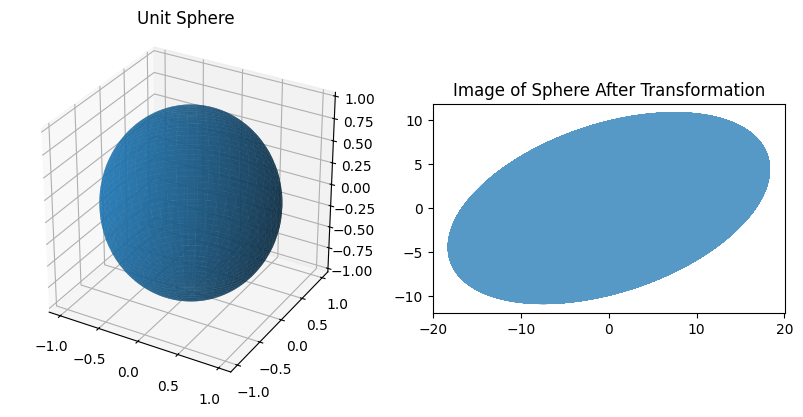

In [88]:
figure1 = plt.figure(figsize=(10,5))

# add axes to the figure
axis11 = figure1.add_subplot(121,projection='3d')
axis12 = figure1.add_subplot(122)

# set aspect ratios
axis11.set_aspect('equal')
axis12.set_aspect('equal')

# set titles
axis11.set_title("Unit Sphere")
axis12.set_title("Image of Sphere After Transformation")

# add images to the axes
axis11.plot_surface(X,Y,Z,alpha=0.75)
axis12.plot(image_array[0],image_array[1],alpha=0.75);

In [89]:
B = A.transpose()@A
B_eigvals, B_eigvecs = la.eig(B)
B_eigvals

array([ 3.60000000e+02, -3.71123759e-15,  9.00000000e+01])

In [90]:
image_vecs = [None]*3
for i in range(3):
    image_vecs[i] = np.array([A@B_eigvecs[i]]).transpose()
    print(A@B_eigvecs[i])

[-18.  -6.]
[-4.99600361e-15  3.33066907e-16]
[ 3. -9.]


In [97]:
image_data = image_vecs[0]@np.cos(u)+image_vecs[2]@np.sin(u)

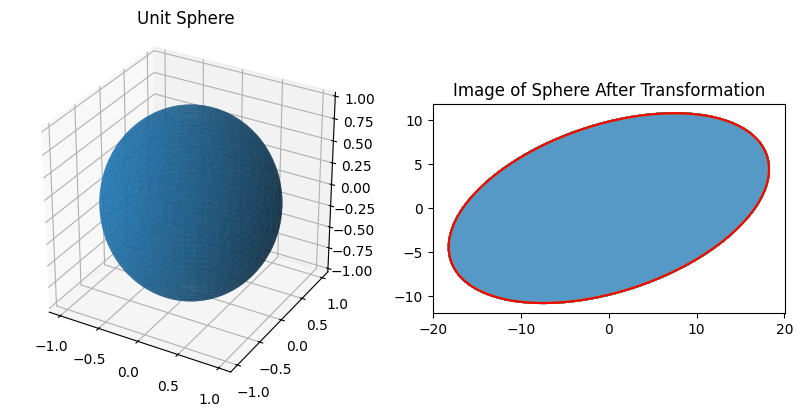

In [100]:
axis12.plot(image_data[0],image_data[1],'r');
figure1